# Lesson 11: API REQUESTS

In [28]:
import pandas as pd
import requests 
import numpy as np
import json
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from langchain_groq import ChatGroq
import os

In [4]:
# Comando curl en bash  es para comunicarnos con la API, se comunica a traves de la url y los argumentos, 
# que van despues del signo ?, por ejemplo:
# curl "https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&current=temperature_2m,wind_speed_10m&hourly=temperature_2m,relative_humidity_2m,wind_speed_10m"
# El formato de repuesta de la comunicacion con un API es un JSON, se puede traducir a un diccionario

In [5]:
# Crear diccionario con Name, LastName, siblings, hobbies
diccionario = {
    "name": "Nallely",
    "LastName":"Quintero",
    "siblings": 1,
    "Hobbies":["reading", "walks", "draw"]}

print(diccionario)

{'name': 'Nallely', 'LastName': 'Quintero', 'siblings': 1, 'Hobbies': ['reading', 'walks', 'draw']}


In [6]:
json.dumps(diccionario)

'{"name": "Nallely", "LastName": "Quintero", "siblings": 1, "Hobbies": ["reading", "walks", "draw"]}'

In [7]:
json.dumps(diccionario, sort_keys=True)

'{"Hobbies": ["reading", "walks", "draw"], "LastName": "Quintero", "name": "Nallely", "siblings": 1}'

In [8]:
# Proceso inverso, respuesta JSON a diccionario
result = '{"name":"John", "LastName":"Connor", "siblings":0}'
result_dict = json.loads(result)
result_dict

{'name': 'John', 'LastName': 'Connor', 'siblings': 0}

In [9]:
url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude":52.52,
    "longitude":13.41,
    "current": "temperature_2m,wind_speed_10m",
    "hourly":  "temperature_2m,relative_humidity_2m,wind_speed_10m"
}

In [10]:
api_call = requests.get(url, params=params)

In [11]:
api_call

<Response [200]>

In [12]:
if api_call.status_code==200:
    data = api_call.json()
    print(data)
else:
    print(f"failed: {api_call.status_code}")

{'latitude': 52.52, 'longitude': 13.419998, 'generationtime_ms': 0.20003318786621094, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 38.0, 'current_units': {'time': 'iso8601', 'interval': 'seconds', 'temperature_2m': '°C', 'wind_speed_10m': 'km/h'}, 'current': {'time': '2025-01-28T03:15', 'interval': 900, 'temperature_2m': 6.8, 'wind_speed_10m': 9.7}, 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°C', 'relative_humidity_2m': '%', 'wind_speed_10m': 'km/h'}, 'hourly': {'time': ['2025-01-28T00:00', '2025-01-28T01:00', '2025-01-28T02:00', '2025-01-28T03:00', '2025-01-28T04:00', '2025-01-28T05:00', '2025-01-28T06:00', '2025-01-28T07:00', '2025-01-28T08:00', '2025-01-28T09:00', '2025-01-28T10:00', '2025-01-28T11:00', '2025-01-28T12:00', '2025-01-28T13:00', '2025-01-28T14:00', '2025-01-28T15:00', '2025-01-28T16:00', '2025-01-28T17:00', '2025-01-28T18:00', '2025-01-28T19:00', '2025-01-28T20:00', '2025-01-28T21:00', '2025-01-28T22:00', '2025-01

In [13]:
type(data)

dict

In [14]:
#traer la latitud y longitud
data["latitude"]

52.52

In [15]:
data["hourly"]

{'time': ['2025-01-28T00:00',
  '2025-01-28T01:00',
  '2025-01-28T02:00',
  '2025-01-28T03:00',
  '2025-01-28T04:00',
  '2025-01-28T05:00',
  '2025-01-28T06:00',
  '2025-01-28T07:00',
  '2025-01-28T08:00',
  '2025-01-28T09:00',
  '2025-01-28T10:00',
  '2025-01-28T11:00',
  '2025-01-28T12:00',
  '2025-01-28T13:00',
  '2025-01-28T14:00',
  '2025-01-28T15:00',
  '2025-01-28T16:00',
  '2025-01-28T17:00',
  '2025-01-28T18:00',
  '2025-01-28T19:00',
  '2025-01-28T20:00',
  '2025-01-28T21:00',
  '2025-01-28T22:00',
  '2025-01-28T23:00',
  '2025-01-29T00:00',
  '2025-01-29T01:00',
  '2025-01-29T02:00',
  '2025-01-29T03:00',
  '2025-01-29T04:00',
  '2025-01-29T05:00',
  '2025-01-29T06:00',
  '2025-01-29T07:00',
  '2025-01-29T08:00',
  '2025-01-29T09:00',
  '2025-01-29T10:00',
  '2025-01-29T11:00',
  '2025-01-29T12:00',
  '2025-01-29T13:00',
  '2025-01-29T14:00',
  '2025-01-29T15:00',
  '2025-01-29T16:00',
  '2025-01-29T17:00',
  '2025-01-29T18:00',
  '2025-01-29T19:00',
  '2025-01-29T20:00',
  

In [16]:
df = pd.DataFrame(data["hourly"])
df.head()

,time,temperature_2m,relative_humidity_2m,wind_speed_10m
0,2025-01-28T00:00,8.4,86,11.4
1,2025-01-28T01:00,7.9,86,8.4
2,2025-01-28T02:00,7.5,86,10.3
3,2025-01-28T03:00,6.9,88,9.7
4,2025-01-28T04:00,6.7,89,9.4


In [17]:
df['time'] = pd.to_datetime(df['time'])
df.head()

,time,temperature_2m,relative_humidity_2m,wind_speed_10m
0,2025-01-28 00:00:00,8.4,86,11.4
1,2025-01-28 01:00:00,7.9,86,8.4
2,2025-01-28 02:00:00,7.5,86,10.3
3,2025-01-28 03:00:00,6.9,88,9.7
4,2025-01-28 04:00:00,6.7,89,9.4


Text(0, 0.5, 'Temperature')

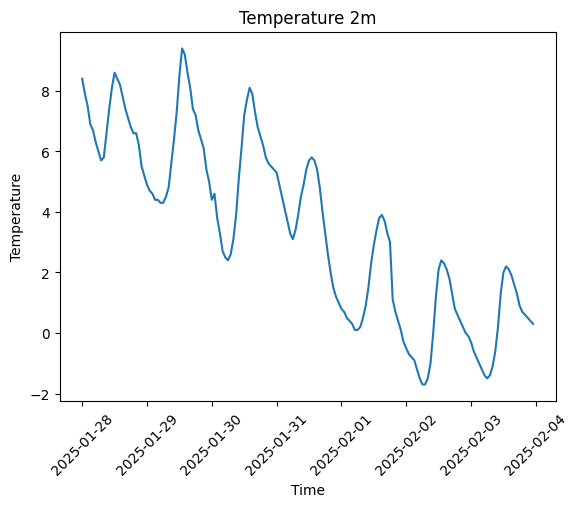

In [18]:
# Graficar la temperatura
plt.plot(df['time'], df['temperature_2m'])
plt.xticks(rotation=45) 
plt.title('Temperature 2m')
plt.xlabel('Time')
plt.ylabel('Temperature')

Text(0, 0.5, 'humidity')

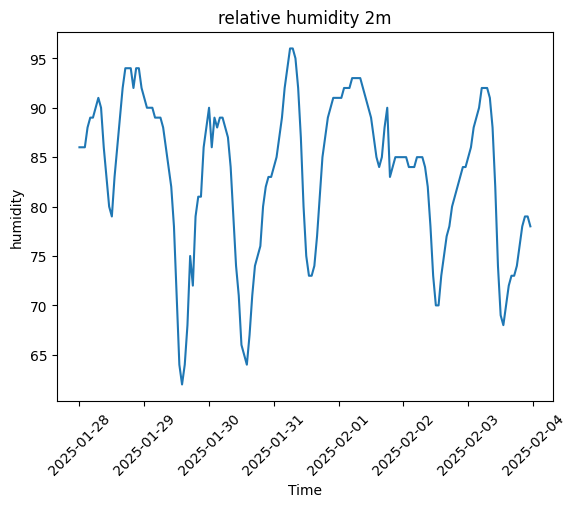

In [19]:
# Graficar la humedad
plt.plot(df['time'], df['relative_humidity_2m'])
plt.xticks(rotation=45) 
plt.title('relative humidity 2m')
plt.xlabel('Time')
plt.ylabel('humidity')

Text(0, 0.5, 'wind speed')

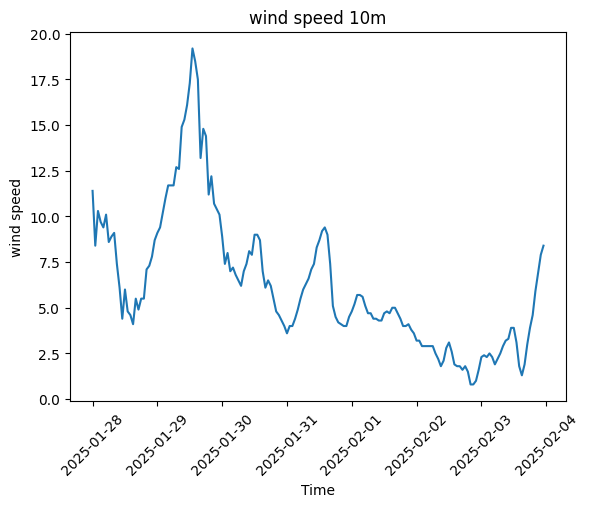

In [20]:
# Graficar la temperatura
plt.plot(df['time'], df['wind_speed_10m'])
plt.xticks(rotation=45) 
plt.title('wind speed 10m')
plt.xlabel('Time')
plt.ylabel('wind speed')

In [22]:
load_dotenv()

True

In [23]:
llm = ChatGroq(model_name="llama3-8b-8192")

In [24]:
message = [
    ("system", "you are a helpful assistant that translates  English to Spanish. Translate the user sentence"),
    ("human", "I love programming in Python")
]

In [26]:
msg_llm = llm.invoke(message)
print(msg_llm)

content='Me encanta programar en Python' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 36, 'total_tokens': 44, 'completion_time': 0.006666667, 'prompt_time': 0.005356592, 'queue_time': 0.019928117, 'total_time': 0.012023259}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_a97cfe35ae', 'finish_reason': 'stop', 'logprobs': None} id='run-648fd771-65e6-4745-ab73-788101f6af15-0' usage_metadata={'input_tokens': 36, 'output_tokens': 8, 'total_tokens': 44}


In [30]:
url = "https://api.groq.com/openai/v1/chat/completions" #API endpoint
api_key = os.getenv("GROQ_API_KEY")
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"
}

data = {
    "model": "llama3-8b-8192",
    "messages": [
        {
            "role": "user",
            "content": "Who are the Beatles?"
        }
    ]
}
response = requests.post(url, headers=headers, json=data)
response

<Response [200]>

In [31]:
response_data = response.json()
print(response_data)

{'id': 'chatcmpl-56397878-b4cb-4e0e-9f32-cd331c3ed3ff', 'object': 'chat.completion', 'created': 1738036864, 'model': 'llama3-8b-8192', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'What a question!\n\nThe Beatles were a British rock band that formed in Liverpool, England in 1960. They are widely regarded as one of the most influential and successful bands in the history of popular music. The group consisted of four members:\n\n1. John Lennon (1940-1980) - rhythm guitar, keyboards, harmonica, and vocals\n2. Paul McCartney (born 1942) - bass guitar, piano, keyboards, and vocals\n3. George Harrison (1943-2001) - lead guitar, keyboards, and vocals\n4. Ringo Starr (born 1940) - drums, percussion, and vocals\n\nThe Beatles are often credited with changing the course of popular music, influencing countless other artists, and contributing to the cultural and social upheaval of the 1960s. They are known for their unique blend of rock, pop, folk, and classical music, as w